# Datasets and their Plots

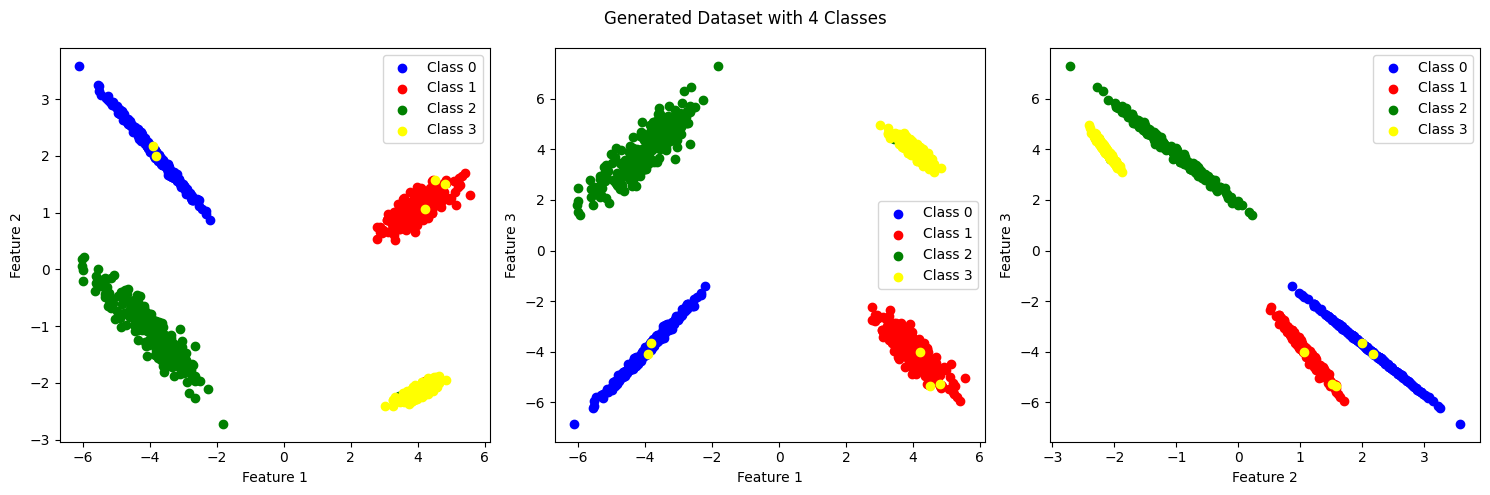

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=1000, n_redundant=1, n_clusters_per_class=1, class_sep=4, n_features=3, n_classes=4, random_state=64)

colors = np.array(['blue', 'red', 'green', 'yellow'])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

feature_pairs = [(0, 1), (0, 2), (1, 2)]

for i, ax in enumerate(axs):
    for j in range(4):
        ax.scatter(X[y == j, feature_pairs[i][0]], X[y == j, feature_pairs[i][1]], label=f'Class {j}', c=colors[j])
    ax.set_xlabel(f'Feature {feature_pairs[i][0]+1}')
    ax.set_ylabel(f'Feature {feature_pairs[i][1]+1}')
    ax.legend()

plt.suptitle('Generated Dataset with 4 Classes')
plt.tight_layout()
plt.show()


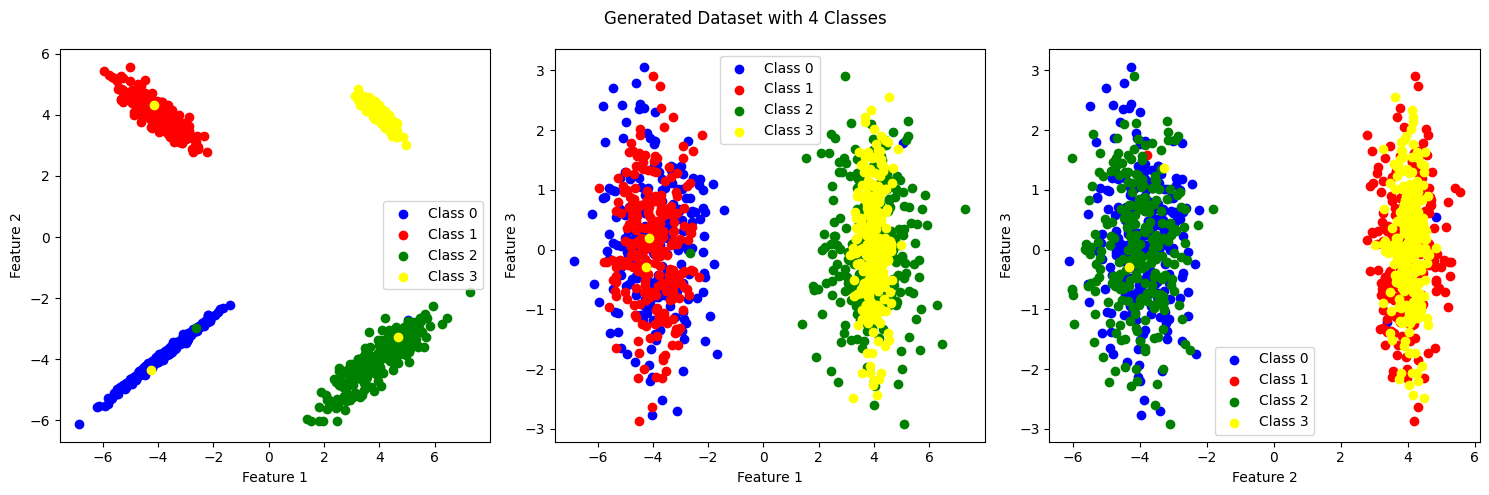

In [ ]:

X, y = make_classification(n_samples=1000, n_redundant=0, n_clusters_per_class=1, class_sep=4, n_features=3, n_classes=4, random_state=64)

colors = np.array(['blue', 'red', 'green', 'yellow'])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

feature_pairs = [(0, 1), (0, 2), (1, 2)]

for i, ax in enumerate(axs):
    for j in range(4):
        ax.scatter(X[y == j, feature_pairs[i][0]], X[y == j, feature_pairs[i][1]], label=f'Class {j}', c=colors[j])
    ax.set_xlabel(f'Feature {feature_pairs[i][0]+1}')
    ax.set_ylabel(f'Feature {feature_pairs[i][1]+1}')
    ax.legend()

plt.suptitle('Generated Dataset with 4 Classes')
plt.tight_layout()
plt.show()


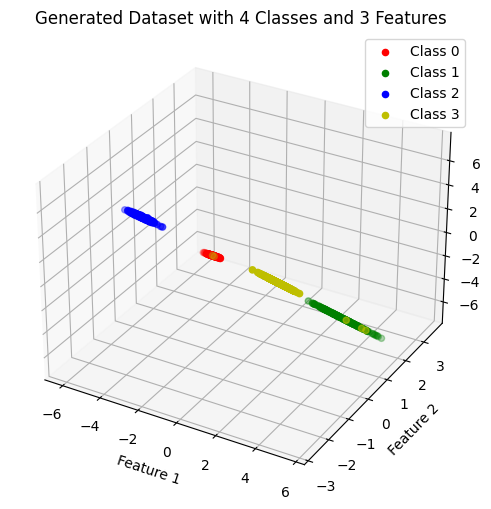

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, y = make_classification(n_samples=1000, n_redundant=1, n_clusters_per_class=1, class_sep=4, n_features=3, n_classes=4, random_state=64)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
for i, color in zip(range(4), colors):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], c=color, label=f'Class {i}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.title('Generated Dataset with 4 Classes and 3 Features')
plt.show()


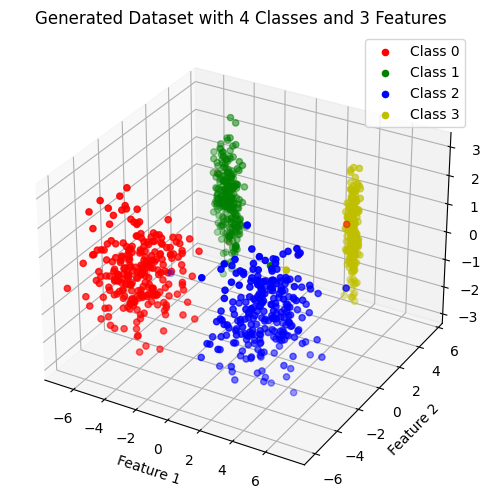

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, y = make_classification(n_samples=1000, n_redundant=0, n_clusters_per_class=1, class_sep=4, n_features=3, n_classes=4, random_state=64)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
for i, color in zip(range(4), colors):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], c=color, label=f'Class {i}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.title('Generated Dataset with 4 Classes and 3 Features')
plt.show()


# Training and Testing the datas with  linear classifiers

**With n_redundant = 1 and random_sate = 64**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X, y = make_classification(n_samples=1000, n_redundant=1, n_clusters_per_class=1, class_sep=4, n_features=3, n_classes=4, random_state=64)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(max_iter=1000)
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10] , 'max_iter': [100, 500, 1000]},
    'SGD Classifier': {'alpha': [0.0001, 0.001, 0.01, 0.1], 'eta0': [0.01, 0.1, 1], 'max_iter': [100, 500, 1000]}
}


# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    # Training phase accuracy
    y_train_pred = best_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Testing phase accuracy
    y_test_pred = best_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results[name] = {'Best Parameters': grid_search.best_params_,
                     'Training Accuracy': train_accuracy,
                     'Testing Accuracy': test_accuracy}
# Display results
for name, result in results.items():
    print(f"{name}:\nBest Parameters: {result['Best Parameters']}\nTraining Accuracy: {result['Training Accuracy']}\nTesting Accuracy: {result['Testing Accuracy']}\n")




Training Logistic Regression...
Training SGD Classifier...
Logistic Regression:
Best Parameters: {'C': 0.001, 'max_iter': 100}
Training Accuracy: 0.9925
Testing Accuracy: 0.975

SGD Classifier:
Best Parameters: {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 100}
Training Accuracy: 0.9925
Testing Accuracy: 0.975



**With n_redundant = 0 and random_sate = 64**



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X, y = make_classification(n_samples=1000, n_redundant=0, n_clusters_per_class=1, class_sep=4, n_features=3, n_classes=4, random_state=64)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(max_iter=1000)
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10] , 'max_iter': [100, 500, 1000]},
    'SGD Classifier': {'alpha': [0.0001, 0.001, 0.01, 0.1], 'eta0': [0.01, 0.1, 1], 'max_iter': [100, 500, 1000]}
}


# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    # Training phase accuracy
    y_train_pred = best_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Testing phase accuracy
    y_test_pred = best_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results[name] = {'Best Parameters': grid_search.best_params_,
                     'Training Accuracy': train_accuracy,
                     'Testing Accuracy': test_accuracy}

# Display results
for name, result in results.items():
    print(f"{name}:\nBest Parameters: {result['Best Parameters']}\nTraining Accuracy: {result['Training Accuracy']}\nTesting Accuracy: {result['Testing Accuracy']}\n")


Training Logistic Regression...
Training SGD Classifier...
Logistic Regression:
Best Parameters: {'C': 0.001, 'max_iter': 100}
Training Accuracy: 0.99375
Testing Accuracy: 0.98

SGD Classifier:
Best Parameters: {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 100}
Training Accuracy: 0.99375
Testing Accuracy: 0.98



**With n_redundant = 1 and random_sate = 32**


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X, y = make_classification(n_samples=1000, n_redundant=1, n_clusters_per_class=1, class_sep=4, n_features=3, n_classes=4, random_state=32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(max_iter=1000)
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10] , 'max_iter': [100, 500, 1000]},
    'SGD Classifier': {'alpha': [0.0001, 0.001, 0.01, 0.1], 'eta0': [0.01, 0.1, 1], 'max_iter': [100, 500, 1000]}
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    # Training phase accuracy
    y_train_pred = best_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Testing phase accuracy
    y_test_pred = best_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results[name] = {'Best Parameters': grid_search.best_params_,
                     'Training Accuracy': train_accuracy,
                     'Testing Accuracy': test_accuracy}

# Display results
for name, result in results.items():
    print(f"{name}:\nBest Parameters: {result['Best Parameters']}\nTraining Accuracy: {result['Training Accuracy']}\nTesting Accuracy: {result['Testing Accuracy']}\n")


Training Logistic Regression...
Training SGD Classifier...
Logistic Regression:
Best Parameters: {'C': 0.001, 'max_iter': 100}
Training Accuracy: 0.9975
Testing Accuracy: 0.995

SGD Classifier:
Best Parameters: {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 100}
Training Accuracy: 0.9975
Testing Accuracy: 0.995



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


X, y = make_classification(n_samples=1000, n_redundant=0, n_clusters_per_class=1, class_sep=4, n_features=3, n_classes=4, random_state=32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(max_iter=1000)
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10] , 'max_iter': [100, 500, 1000]},
    'SGD Classifier': {'alpha': [0.0001, 0.001, 0.01, 0.1], 'eta0': [0.01, 0.1, 1], 'max_iter': [100, 500, 1000]}
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    # Training phase accuracy
    y_train_pred = best_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Testing phase accuracy
    y_test_pred = best_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results[name] = {'Best Parameters': grid_search.best_params_,
                     'Training Accuracy': train_accuracy,
                     'Testing Accuracy': test_accuracy}

# Display results
for name, result in results.items():
    print(f"{name}:\nBest Parameters: {result['Best Parameters']}\nTraining Accuracy: {result['Training Accuracy']}\nTesting Accuracy: {result['Testing Accuracy']}\n")


Training Logistic Regression...
Training SGD Classifier...
Logistic Regression:
Best Parameters: {'C': 0.001, 'max_iter': 100}
Training Accuracy: 0.98875
Testing Accuracy: 0.995

SGD Classifier:
Best Parameters: {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 100}
Training Accuracy: 0.98875
Testing Accuracy: 0.995



# Decision Boundary

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


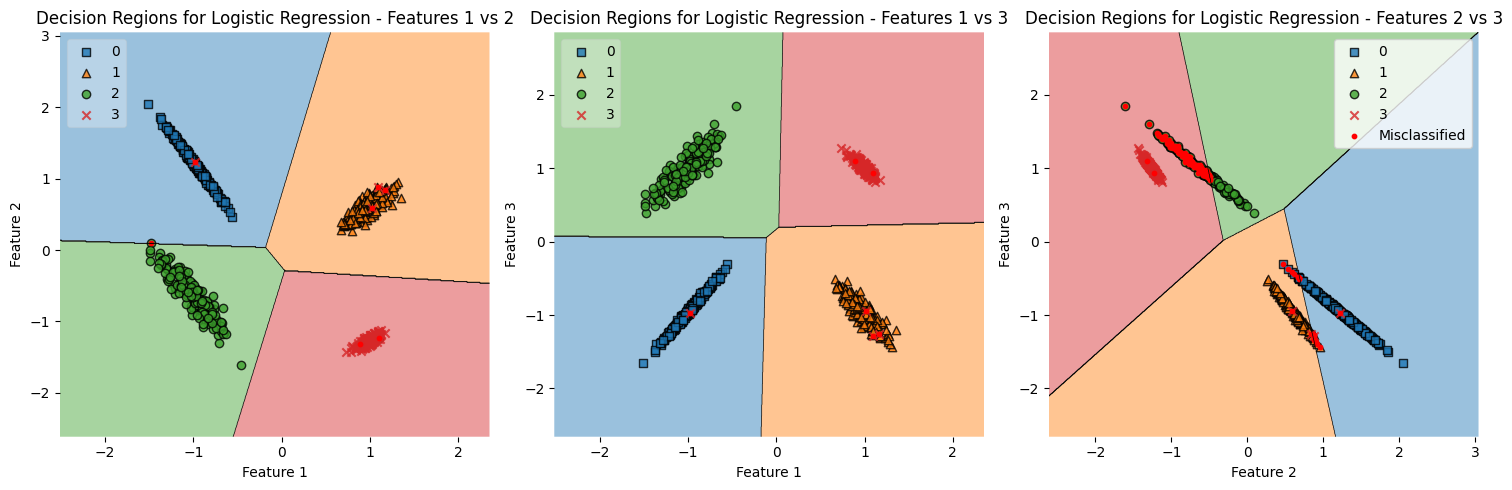

Training SGD Classifier...


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


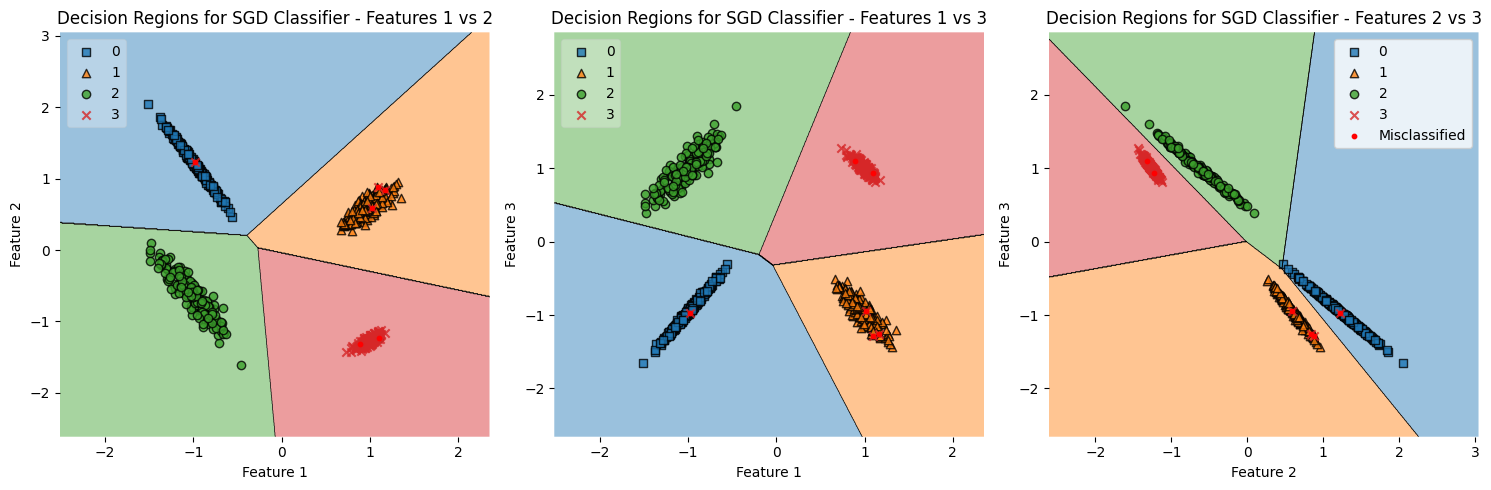

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate dataset
X, y = make_classification(n_samples=1000, n_redundant=1, n_clusters_per_class=1, class_sep=4, n_features=3, n_classes=4, random_state=64)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(max_iter=1000)
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10] , 'max_iter': [100, 500, 1000]},
    'SGD Classifier': {'alpha': [0.0001, 0.001, 0.01, 0.1], 'eta0': [0.01, 0.1, 1], 'max_iter': [100, 500, 1000]}
}
# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_clf = grid_search.best_estimator_


    # Plot decision regions and misclassified data points for each pair of features
    plt.figure(figsize=(15, 5))
    for i, feature_pair in enumerate([(0, 1), (0, 2), (1, 2)]):
        # Train the classifier only on selected features
        X_train_pair = X_train_scaled[:, feature_pair]
        best_clf.fit(X_train_pair, y_train)

        # Plot decision regions
        plt.subplot(1, 3, i + 1)
        plot_decision_regions(X_train_pair, y_train, clf=best_clf, legend=2)
        plt.xlabel(f'Feature {feature_pair[0] + 1}')
        plt.ylabel(f'Feature {feature_pair[1] + 1}')
        plt.title(f'Decision Regions for {name} - Features {feature_pair[0] + 1} vs {feature_pair[1] + 1}')

        # Highlight misclassified data points
        misclassified_mask = y_train != best_clf.predict(X_train_pair)
        plt.scatter(X_train_pair[misclassified_mask, 0], X_train_pair[misclassified_mask, 1],
                    marker='o', s=10, c='red', label='Misclassified')

    plt.tight_layout()
    plt.legend()
    plt.show()


# Draw Data

In [1]:
!pip install drawdata


In [3]:
from drawdata import ScatterWidget
import pandas as pd
widget = ScatterWidget()
widget

ScatterWidget()

In [23]:
# Get the drawn data as a dataframe
df=widget.data_as_pandas
print(df.shape)
#widget.data_as_polars
X = df[['x' , 'y']]
y = df['label']

df.to_csv('/content/drawdata.csv', index=False)


(1248, 4)


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


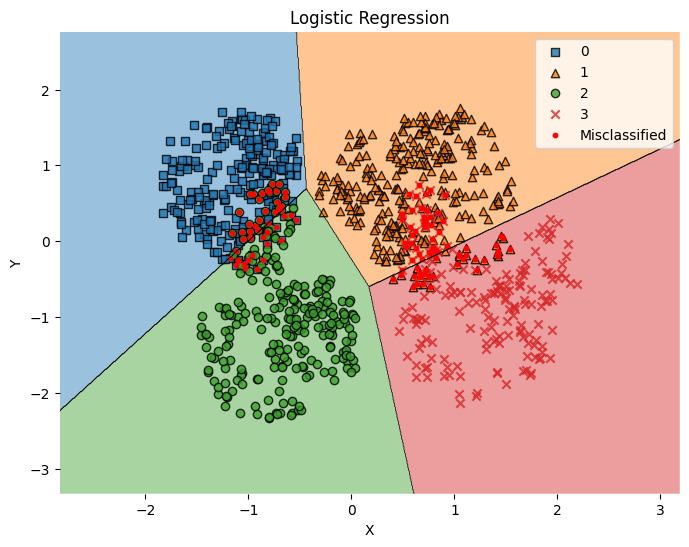

Training SGD Classifier...


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


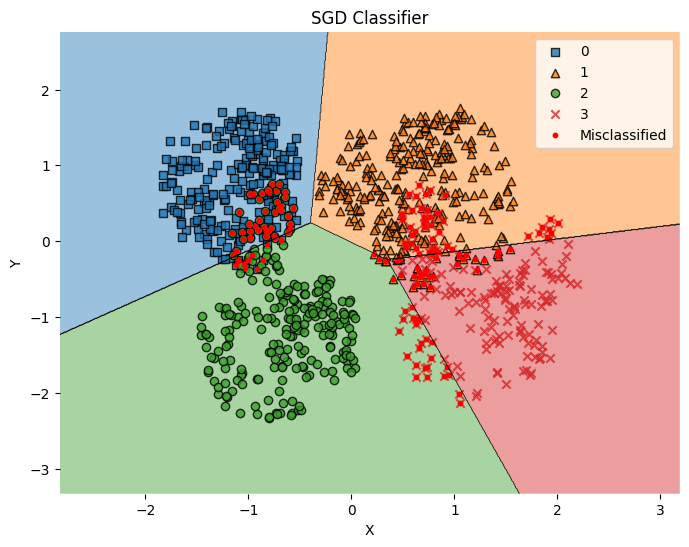

Logistic Regression:
Best Parameters: {'C': 10, 'max_iter': 100}
Training Accuracy: 0.8797595190380761
Testing Accuracy: 0.876

SGD Classifier:
Best Parameters: {'alpha': 0.001, 'eta0': 0.01, 'max_iter': 500}
Training Accuracy: 0.8396793587174348
Testing Accuracy: 0.836



In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the class labels
y_encoded = label_encoder.fit_transform(y)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=64)




# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(max_iter=5000)
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [100, 500, 1000]},
    'SGD Classifier': {'alpha': [0.0001, 0.001, 0.01, 0.1], 'eta0': [0.01, 0.1, 1, 10], 'max_iter': [100, 500, 1000, 5000]}
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    # Training phase accuracy
    y_train_pred = best_clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Testing phase accuracy
    y_test_pred = best_clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results[name] = {'Best Parameters': grid_search.best_params_,
                     'Training Accuracy': train_accuracy,
                     'Testing Accuracy': test_accuracy}

    # Plot decision regions
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_train, y_train, clf=best_clf, legend=2)
    plt.title(name)
    plt.xlabel('X')
    plt.ylabel('Y')



    # Highlight misclassified data points
    misclassified_mask = y_train != best_clf.predict(X_train)
    plt.scatter(X_train[misclassified_mask, 0], X_train[misclassified_mask, 1],
                 marker='o', s=10, c='red', label='Misclassified')

    plt.legend()
    plt.show()

# Display results
for name, result in results.items():
    print(f"{name}:\nBest Parameters: {result['Best Parameters']}\nTraining Accuracy: {result['Training Accuracy']}\nTesting Accuracy: {result['Testing Accuracy']}\n")
